## Correct distortion on K-MOR data

In [1]:
# Packages
import numpy as np
import hyperspy.api as hs # v1.7.1
import pyxem as pxm  # v0.14.2 dependent on Pint v0.19.1
from hyperspy.misc.utils import stack as stack_method

In [2]:
# Folder of distortion matrix + scale
folder = 'D:/Aurora/Master data/DataFebruar/DistortionCorrection/'
# Filename of distortion matrix from AU distortion correction
dist_file = 'AuX_80kV_120cm_dist.txt'
# Filename of file containing scale from Au distortion correction
scale_file = 'AuX_80kV_120cm_calibration_manual.txt'
# Targeted frame
frame = '00063'
# Dataset name
dataset = 'K-MOR_31'
data_file = 'D:/Aurora/Master data/DataFebruar/K-MOR_best_datasets/'+dataset+'/tiff/'+frame+'.tiff'

0.005841731629348348


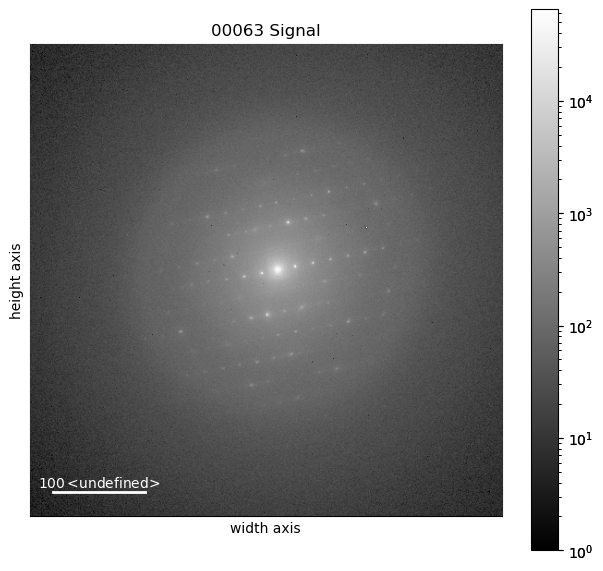

In [3]:
# Load data 
dif = hs.load(data_file)

# Load scale 
scale = np.loadtxt(folder+scale_file)
print(scale)

dif.plot(norm='log')

In [4]:
# Load the file into a 1D NumPy array
distrotion_data = np.loadtxt(folder+dist_file)

# Reshape the 1D array into a 3x3 matrix
matrix = np.reshape(distrotion_data, (3, 3))

print(matrix)

[[0.98547086 0.01790606 0.        ]
 [0.01790606 0.97793216 0.        ]
 [0.         0.         1.        ]]


In [5]:
# Resize data to useful format (Signal2D --> ElectronDiffraction2D)
size = dif.data.shape[0]
dpegs = stack_method([dif, dif, dif, dif])
dpegs = pxm.signals.ElectronDiffraction2D(dpegs.data.reshape((2, 2, size, size)))

[########################################] | 100% Completed | 106.38 ms


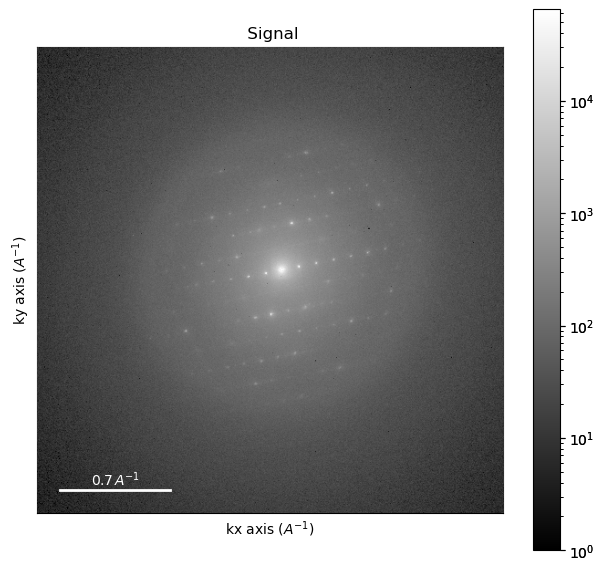

In [6]:
# Plot scaled uncorrected pattern (to be compared to corrected version)
dpeggo = dpegs.inav[0,0]
dpeggo.set_diffraction_calibration(scale)
dpeggo.plot(norm='log')

[########################################] | 100% Completed | 120.52 ms


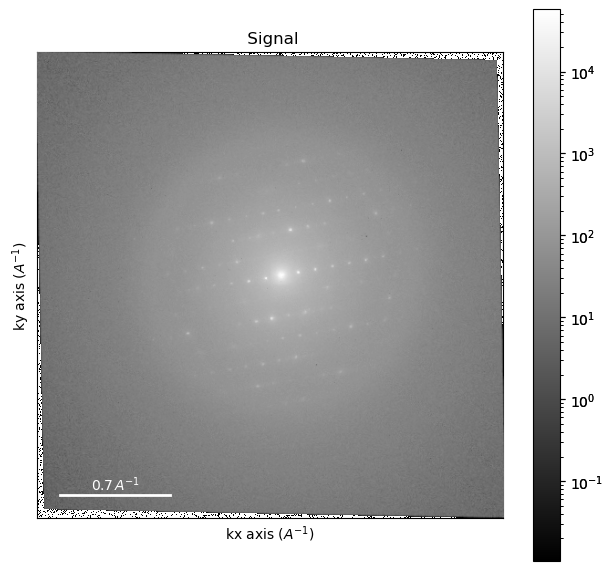

In [7]:
# Apply matrix to correct for distortion
dpegs = dpegs.apply_affine_transformation(
    matrix, preserve_range=True, inplace=False)
dpegm = dpegs.inav[0, 0]

# Plot ellipticity corrected pattern
dpegm.set_diffraction_calibration(scale)
dpegm.plot(norm='log')